# EDA & Visualization: Auto Major Warranty Data Analysis

> - Author: Aditya Ramesh Ganti
> - Email: contactme@gadityaramesh.com or adityaramesh.g@gyandata.com

## Introduction & Agenda

This notebook provides comprehensive exploratory data analysis and visualization of Auto Major warranty data to understand patterns, relationships, and business insights before applying machine learning models.

## Session Overview (30 minutes)

**Learning Objectives**:
- Understand Auto Major warranty dataset structure and quality
- Apply realistic categorical variable encoding techniques
- Explore cost distributions and regional patterns
- Analyze failure risks and environmental factors
- Identify key relationships for modeling
- Generate actionable business insights
- Prepare data insights for ML model selection

In [2]:
# Import essential libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ EDA libraries imported successfully!")
print("📊 Ready for comprehensive warranty data analysis")

✅ EDA libraries imported successfully!
📊 Ready for comprehensive warranty data analysis


### Dataset Loading and Initial Overview

Load the warranty dataset and examine its basic structure before any preprocessing.

In [3]:
# Load and examine raw dataset structure
df_raw = pd.read_csv('../data/auto_major_warranty_indian_enhanced_25k.csv')

print("📋 RAW DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df_raw.shape}")
print(f"Total vehicles: {len(df_raw):,}")
print(f"Features: {df_raw.shape[1]}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n🔍 Sample raw data:")
display(df_raw.head())

# Examine data types
print(f"\n📊 Raw data types summary:")
dtype_summary = df_raw.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"  {dtype}: {count} columns")

# Identify categorical vs numerical columns
categorical_columns = df_raw.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_raw.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n🔤 Categorical columns ({len(categorical_columns)}):")
for col in categorical_columns:
    unique_count = df_raw[col].nunique()
    print(f"  {col}: {unique_count} unique values")

print(f"\n🔢 Numerical columns ({len(numerical_columns)}):")
for col in numerical_columns[:10]:  # Show first 10
    print(f"  {col}: {df_raw[col].dtype}")

📋 RAW DATASET OVERVIEW
Dataset shape: (25000, 36)
Total vehicles: 25,000
Features: 36
Memory usage: 24.82 MB

🔍 Sample raw data:


,vehicle_id,make_model_code,manufacturing_year,engine_type,transmission_type,manufacturing_batch,warranty_duration_months,warranty_mileage_limit,vehicle_age_at_claim,annual_mileage,...,monsoon_months_per_year,engine_failure_risk,transmission_failure_risk,electrical_failure_risk,suspension_failure_risk,brake_failure_risk,ac_system_failure_risk,total_repair_cost,number_of_claims,high_cost_claim_flag
0,VEH_000000,VW_Sedan,2019,Diesel,Automatic,BATCH_2019_Sedan_05,48,75000,0.87,21395,...,3.0,0.1560,0.1093,0.2796,0.1691,0.2932,0.3840,22912,1,0
1,VEH_000001,VW_Electric,2019,Electric,Automatic,BATCH_2019_Electric_09,36,75000,0.54,7246,...,4.2,0.0111,0.0597,0.1074,0.0836,0.1686,0.3020,4069,1,0
2,VEH_000002,VW_SUV,2022,Petrol,CVT,BATCH_2022_SUV_07,60,100000,0.10,10075,...,0.0,0.1014,0.0508,0.1159,0.0759,0.1186,0.2588,4298,1,0
3,VEH_000003,VW_SUV,2024,Petrol,Automatic,BATCH_2024_SUV_02,48,100000,0.03,9996,...,3.0,0.2010,0.1154,0.3048,0.1686,0.3097,0.5241,400061,3,1
4,VEH_000004,VW_Compact,2022,Petrol,AMT,BATCH_2022_Compact_01,36,100000,3.00,9441,...,1.6,0.1119,0.0895,0.1770,0.1190,0.1960,0.3096,16093,3,0



📊 Raw data types summary:
  float64: 15 columns
  object: 13 columns
  int64: 8 columns

🔤 Categorical columns (13):
  vehicle_id: 25000 unique values
  make_model_code: 5 unique values
  engine_type: 5 unique values
  transmission_type: 4 unique values
  manufacturing_batch: 420 unique values
  terrain_type: 4 unique values
  climate_zone: 5 unique values
  region_code: 20 unique values
  indian_region: 6 unique values
  road_surface_type: 5 unique values
  monsoon_exposure: 4 unique values
  air_pollution_level: 4 unique values
  fuel_quality: 3 unique values

🔢 Numerical columns (23):
  manufacturing_year: int64
  warranty_duration_months: int64
  warranty_mileage_limit: int64
  vehicle_age_at_claim: float64
  annual_mileage: int64
  mileage_at_claim: int64
  driving_style_score: float64
  service_frequency_score: float64
  road_quality_index: float64
  temperature_extreme_score: float64


#### Categorical Variable Analysis

Analyze categorical variables to understand their characteristics before encoding.

In [4]:
# Detailed analysis of categorical variables
print("🔍 CATEGORICAL VARIABLE ANALYSIS")
print("=" * 45)

for col in categorical_columns:
    if col != 'vehicle_id':  # Skip ID column
        print(f"\n{col.upper()}:")
        value_counts = df_raw[col].value_counts()
        total_unique = len(value_counts)
        
        print(f"  Unique values: {total_unique}")
        print(f"  Value distribution:")
        
        # Show top 5 values
        for value, count in value_counts.head().items():
            percentage = (count / len(df_raw)) * 100
            print(f"    {value}: {count:,} ({percentage:.1f}%)")
        
        if total_unique > 5:
            print(f"    ... and {total_unique - 5} more categories")
        
        # Check for missing values
        missing_count = df_raw[col].isnull().sum()
        if missing_count > 0:
            print(f"  Missing values: {missing_count} ({missing_count/len(df_raw)*100:.1f}%)")

🔍 CATEGORICAL VARIABLE ANALYSIS

MAKE_MODEL_CODE:
  Unique values: 5
  Value distribution:
    VW_Sedan: 7,536 (30.1%)
    VW_Compact: 6,210 (24.8%)
    VW_SUV: 4,986 (19.9%)
    VW_Hatch: 3,747 (15.0%)
    VW_Electric: 2,521 (10.1%)

ENGINE_TYPE:
  Unique values: 5
  Value distribution:
    Petrol: 13,098 (52.4%)
    Diesel: 7,430 (29.7%)
    Electric: 2,521 (10.1%)
    CNG: 1,503 (6.0%)
    Hybrid: 448 (1.8%)

TRANSMISSION_TYPE:
  Unique values: 4
  Value distribution:
    Manual: 9,591 (38.4%)
    Automatic: 8,333 (33.3%)
    AMT: 5,813 (23.3%)
    CVT: 1,263 (5.1%)

MANUFACTURING_BATCH:
  Unique values: 420
  Value distribution:
    BATCH_2022_Sedan_02: 174 (0.7%)
    BATCH_2022_Sedan_01: 170 (0.7%)
    BATCH_2022_Sedan_11: 167 (0.7%)
    BATCH_2022_Sedan_05: 163 (0.7%)
    BATCH_2022_Compact_11: 162 (0.6%)
    ... and 415 more categories

TERRAIN_TYPE:
  Unique values: 4
  Value distribution:
    Urban: 12,385 (49.5%)
    Highway: 6,457 (25.8%)
    Mixed: 4,231 (16.9%)
    Off-roa

##### Categorical Encoding Strategy

Implement realistic categorical encoding based on variable characteristics and business context, including ordinal encoding for naturally ordered variables.

In [ ]:
# Define categorical encoding function based on data characteristics
def encode_categorical_variables(df):
    """
    Encode categorical variables using appropriate strategies based on:
    - Variable cardinality (number of unique values)
    - Business context and interpretability
    - Data type and patterns
    - Ordinal nature of variables
    """
    
    df_encoded = df.copy()
    encoding_info = {}
    
    # Define ordinal variables with their ACTUAL order from the dataset
    ordinal_mappings = {
        'monsoon_exposure': {'Minimal': 1, 'Low': 2, 'Medium': 3, 'High': 4},
        'air_pollution_level': {'Low': 1, 'Moderate': 2, 'High': 3, 'Severe': 4},
        'fuel_quality': {'Below_Standard': 1, 'Standard': 2, 'Premium': 3},
        'road_surface_type': {'Paved_Highway': 1, 'Paved_City': 2, 'Semi_Paved': 3, 'Gravel': 4, 'Dirt_Track': 5}
    }
    
    # Define encoding strategies for each categorical column
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if col != 'vehicle_id']
    
    print("🛠️ APPLYING CATEGORICAL ENCODING STRATEGIES")
    print("=" * 50)
    
    for col in categorical_columns:
        unique_count = df[col].nunique()
        unique_values = df[col].unique()
        
        print(f"\nProcessing {col}:")
        print(f"  Cardinality: {unique_count}")
        print(f"  Sample values: {list(unique_values)[:3]}")
        
        # Handle missing values first
        if df[col].isnull().any():
            missing_count = df[col].isnull().sum()
            print(f"  Filling {missing_count} missing values with 'Unknown'")
            df_encoded[col] = df_encoded[col].fillna('Unknown')
        
        # Apply encoding strategy
        if col in ordinal_mappings:
            # Ordinal encoding with predefined order
            mapping = ordinal_mappings[col]
            # Handle any values not in mapping by assigning them neutral/middle values
            df_encoded[col] = df_encoded[col].map(mapping)
            # Fill any unmapped values with median ordinal value
            if df_encoded[col].isnull().any():
                median_val = np.median(list(mapping.values()))
                df_encoded[col] = df_encoded[col].fillna(median_val)
            
            encoding_info[col] = {
                'method': 'Ordinal Encoding',
                'mapping': mapping,
                'new_columns': [col]
            }
            print(f"  Applied: Ordinal Encoding")
            print(f"  Mapping: {mapping}")
            
        elif unique_count == 2:
            # Binary categorical - use label encoding
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoding_info[col] = {
                'method': 'Label Encoding (Binary)',
                'mapping': dict(zip(le.classes_, le.transform(le.classes_))),
                'new_columns': [col]
            }
            print(f"  Applied: Label Encoding (Binary)")
            print(f"  Mapping: {encoding_info[col]['mapping']}")
            
        elif unique_count <= 5:
            # Low cardinality - use one-hot encoding (drop first to avoid multicollinearity)
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
            
            # Drop original column and add dummy columns
            df_encoded = df_encoded.drop(columns=[col])
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            
            encoding_info[col] = {
                'method': 'One-Hot Encoding',
                'original_categories': list(unique_values),
                'new_columns': list(dummies.columns)
            }
            print(f"  Applied: One-Hot Encoding")
            print(f"  Created columns: {list(dummies.columns)}")
            
        else:
            # High cardinality - use label encoding
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoding_info[col] = {
                'method': 'Label Encoding (High Cardinality)',
                'classes': list(le.classes_),
                'new_columns': [col]
            }
            print(f"  Applied: Label Encoding (High Cardinality)")
            print(f"  Encoded {len(le.classes_)} categories")
    
    return df_encoded, encoding_info

# Apply categorical encoding
df_encoded, encoding_summary = encode_categorical_variables(df_raw)

print(f"\n✅ ENCODING COMPLETED")
print(f"Original shape: {df_raw.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"New features created: {df_encoded.shape[1] - df_raw.shape[1]}")

##### Encoding Results Verification

Verify that categorical encoding was applied correctly and examine the results.

In [6]:
# Verify encoding results and display summary
print("🔍 ENCODING VERIFICATION")
print("=" * 30)

# Check data types after encoding
print("Data types after encoding:")
encoded_dtypes = df_encoded.dtypes.value_counts()
for dtype, count in encoded_dtypes.items():
    print(f"  {dtype}: {count} columns")

# Show encoding summary
print(f"\n📋 Encoding Summary:")
for col, info in encoding_summary.items():
    print(f"\n{col}:")
    print(f"  Method: {info['method']}")
    print(f"  Result columns: {info['new_columns']}")
    
    if info['method'] == 'One-Hot Encoding':
        print(f"  Original categories: {len(info['original_categories'])}")
    elif 'mapping' in info:
        print(f"  Category mapping created: {len(info['mapping'])} categories")

# Verify no non-numeric data remains (except vehicle_id)
non_numeric_cols = df_encoded.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'vehicle_id']

if non_numeric_cols:
    print(f"\n⚠️ Warning: Non-numeric columns still present: {non_numeric_cols}")
else:
    print(f"\n✅ All categorical variables successfully encoded to numeric format")

# Show sample of encoded data
print(f"\n📊 Sample encoded data:")
display(df_encoded.head())

# Update our working dataframe
df = df_encoded.copy()

🔍 ENCODING VERIFICATION
Data types after encoding:
  bool: 30 columns
  float64: 15 columns
  int64: 11 columns
  object: 1 columns

📋 Encoding Summary:

make_model_code:
  Method: One-Hot Encoding
  Result columns: ['make_model_code_VW_Electric', 'make_model_code_VW_Hatch', 'make_model_code_VW_SUV', 'make_model_code_VW_Sedan']
  Original categories: 5

engine_type:
  Method: One-Hot Encoding
  Result columns: ['engine_type_Diesel', 'engine_type_Electric', 'engine_type_Hybrid', 'engine_type_Petrol']
  Original categories: 5

transmission_type:
  Method: One-Hot Encoding
  Result columns: ['transmission_type_Automatic', 'transmission_type_CVT', 'transmission_type_Manual']
  Original categories: 4

manufacturing_batch:
  Method: Label Encoding (High Cardinality)
  Result columns: ['manufacturing_batch']

terrain_type:
  Method: One-Hot Encoding
  Result columns: ['terrain_type_Mixed', 'terrain_type_Off-road', 'terrain_type_Urban']
  Original categories: 4

climate_zone:
  Method: One-Hot

,vehicle_id,manufacturing_year,manufacturing_batch,warranty_duration_months,warranty_mileage_limit,vehicle_age_at_claim,annual_mileage,mileage_at_claim,driving_style_score,service_frequency_score,...,road_surface_type_Paved_Highway,road_surface_type_Semi_Paved,monsoon_exposure_Low,monsoon_exposure_Medium,monsoon_exposure_Minimal,air_pollution_level_Low,air_pollution_level_Moderate,air_pollution_level_Severe,fuel_quality_Premium,fuel_quality_Standard
0,VEH_000000,2019,112,48,75000,0.87,21395,18536,4.89,1.00,...,False,True,False,True,False,False,True,False,False,True
1,VEH_000001,2019,80,36,75000,0.54,7246,3885,4.91,7.49,...,False,False,False,False,False,False,False,True,False,True
2,VEH_000002,2022,282,60,100000,0.10,10075,1004,9.46,4.45,...,False,False,False,False,True,False,False,True,False,True
3,VEH_000003,2024,397,48,100000,0.03,9996,255,2.05,1.45,...,False,False,False,True,False,False,False,False,False,True
4,VEH_000004,2022,240,36,100000,3.00,9441,28324,7.98,1.70,...,False,False,True,False,False,False,False,False,True,False


### Basic Dataset Statistics

Generate comprehensive statistics for the encoded dataset.

In [7]:
# Generate comprehensive dataset statistics
print("📊 DATASET STATISTICS AFTER ENCODING")
print("=" * 45)

# Missing values analysis
missing_summary = df.isnull().sum()
if missing_summary.sum() > 0:
    print(f"⚠️ Missing values found:")
    missing_cols = missing_summary[missing_summary > 0]
    for col, missing_count in missing_cols.items():
        print(f"  {col}: {missing_count} ({missing_count/len(df)*100:.1f}%)")
else:
    print(f"✅ No missing values detected")

# Key business metrics
print(f"\n💼 Business metrics overview:")
print(f"Repair cost range: ₹{df['total_repair_cost'].min():,.0f} - ₹{df['total_repair_cost'].max():,.0f}")
print(f"Average repair cost: ₹{df['total_repair_cost'].mean():,.0f}")
print(f"Median repair cost: ₹{df['total_repair_cost'].median():,.0f}")
print(f"High-cost claims: {df['high_cost_claim_flag'].sum():,} ({df['high_cost_claim_flag'].mean()*100:.1f}%)")

# Regional distribution (if encoded as numerical)
if 'indian_region' in df.columns and pd.api.types.is_numeric_dtype(df['indian_region']):
    region_counts = df['indian_region'].value_counts()
    print(f"\nRegional distribution (encoded): {len(region_counts)} regions")
    print(f"Most common region code: {region_counts.index[0]} ({region_counts.iloc[0]} vehicles)")
elif any('indian_region_' in col for col in df.columns):
    # One-hot encoded regions
    region_cols = [col for col in df.columns if 'indian_region_' in col]
    print(f"\nRegional distribution: {len(region_cols) + 1} regions (one-hot encoded)")
    for col in region_cols:
        count = df[col].sum()
        region_name = col.replace('indian_region_', '')
        print(f"  {region_name}: {count} vehicles")

# Vehicle characteristics
print(f"\nVehicle characteristics:")
print(f"Vehicle age range: {df['vehicle_age_at_claim'].min():.1f} - {df['vehicle_age_at_claim'].max():.1f} years")
print(f"Annual mileage range: {df['annual_mileage'].min():,.0f} - {df['annual_mileage'].max():,.0f} km")
print(f"Average driving style score: {df['driving_style_score'].mean():.2f}")

📊 DATASET STATISTICS AFTER ENCODING
✅ No missing values detected

💼 Business metrics overview:
Repair cost range: ₹0 - ₹892,907
Average repair cost: ₹57,819
Median repair cost: ₹23,636
High-cost claims: 5,691 (22.8%)

Regional distribution (encoded): 6 regions
Most common region code: 2 (6331 vehicles)

Vehicle characteristics:
Vehicle age range: 0.0 - 5.0 years
Annual mileage range: 5,000 - 35,000 km
Average driving style score: 5.50


### Target Variable Analysis

Deep dive into warranty costs and high-cost claim patterns using the encoded data.

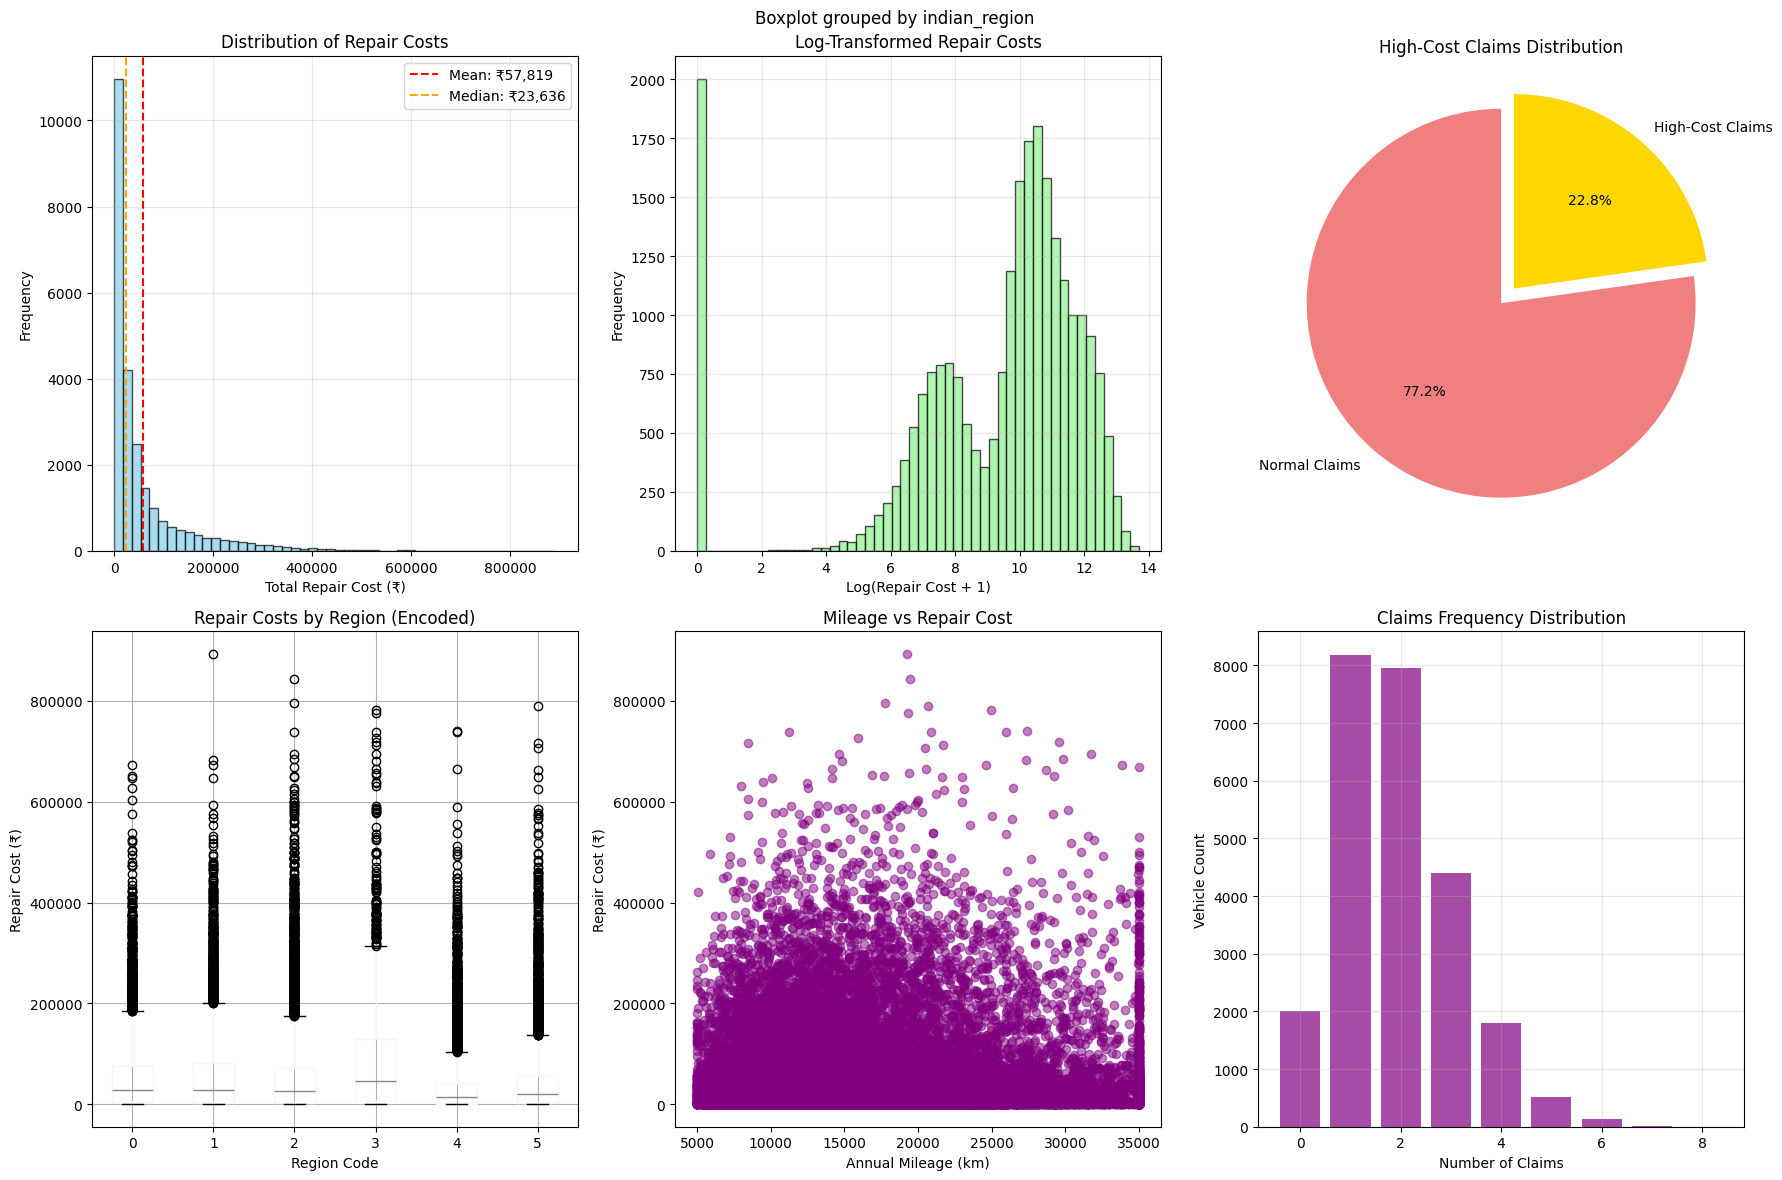

📊 TARGET VARIABLE STATISTICS
Repair Cost Statistics:
  Count: ₹25,000
  Mean: ₹57,819
  Std: ₹90,476
  Min: ₹0
  25%: ₹2,278
  50%: ₹23,636
  75%: ₹66,534
  Max: ₹892,907


In [8]:
# Comprehensive target variable analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Repair cost distribution
axes[0,0].hist(df['total_repair_cost'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Total Repair Cost (₹)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Repair Costs')
axes[0,0].grid(True, alpha=0.3)

# Add summary statistics
mean_cost = df['total_repair_cost'].mean()
median_cost = df['total_repair_cost'].median()
axes[0,0].axvline(mean_cost, color='red', linestyle='--', label=f'Mean: ₹{mean_cost:,.0f}')
axes[0,0].axvline(median_cost, color='orange', linestyle='--', label=f'Median: ₹{median_cost:,.0f}')
axes[0,0].legend()

# 2. Log-transformed repair costs (for better visualization)
log_costs = np.log1p(df['total_repair_cost'])
axes[0,1].hist(log_costs, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_xlabel('Log(Repair Cost + 1)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Log-Transformed Repair Costs')
axes[0,1].grid(True, alpha=0.3)

# 3. High-cost claims distribution
high_cost_counts = df['high_cost_claim_flag'].value_counts()
labels = ['Normal Claims', 'High-Cost Claims']
colors = ['lightcoral', 'gold']
wedges, texts, autotexts = axes[0,2].pie(high_cost_counts.values, labels=labels, colors=colors,
                                        autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
axes[0,2].set_title('High-Cost Claims Distribution')

# 4. Repair costs by encoded region (if available)
if 'indian_region' in df.columns and pd.api.types.is_numeric_dtype(df['indian_region']):
    df.boxplot(column='total_repair_cost', by='indian_region', ax=axes[1,0])
    axes[1,0].set_title('Repair Costs by Region (Encoded)')
    axes[1,0].set_xlabel('Region Code')
    axes[1,0].set_ylabel('Repair Cost (₹)')
else:
    # Alternative visualization if one-hot encoded
    axes[1,0].scatter(df['vehicle_age_at_claim'], df['total_repair_cost'], alpha=0.5)
    axes[1,0].set_xlabel('Vehicle Age at Claim')
    axes[1,0].set_ylabel('Repair Cost (₹)')
    axes[1,0].set_title('Age vs Repair Cost')

# 5. Cost distribution by vehicle type (if encoded)
if 'make_model_code' in df.columns and pd.api.types.is_numeric_dtype(df['make_model_code']):
    df.boxplot(column='total_repair_cost', by='make_model_code', ax=axes[1,1])
    axes[1,1].set_title('Repair Costs by Vehicle Model (Encoded)')
    axes[1,1].set_ylabel('Repair Cost (₹)')
else:
    # Alternative: mileage vs cost
    axes[1,1].scatter(df['annual_mileage'], df['total_repair_cost'], alpha=0.5, color='purple')
    axes[1,1].set_xlabel('Annual Mileage (km)')
    axes[1,1].set_ylabel('Repair Cost (₹)')
    axes[1,1].set_title('Mileage vs Repair Cost')

# 6. Claims frequency analysis
claims_dist = df['number_of_claims'].value_counts().sort_index()
axes[1,2].bar(claims_dist.index, claims_dist.values, alpha=0.7, color='purple')
axes[1,2].set_xlabel('Number of Claims')
axes[1,2].set_ylabel('Vehicle Count')
axes[1,2].set_title('Claims Frequency Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary of target variables
print("📊 TARGET VARIABLE STATISTICS")
print("=" * 40)

cost_stats = df['total_repair_cost'].describe()
print("Repair Cost Statistics:")
for stat, value in cost_stats.items():
    print(f"  {stat.capitalize()}: ₹{value:,.0f}")

### Environmental and Risk Factors Analysis

Examine environmental conditions and component failure risks using encoded categorical variables.

🌍 ENVIRONMENTAL & RISK ANALYSIS WITH ENCODED DATA
Risk factors identified: 6
  engine_failure_risk: mean = 0.1289
  transmission_failure_risk: mean = 0.0812
  electrical_failure_risk: mean = 0.1995
  suspension_failure_risk: mean = 0.1165
  brake_failure_risk: mean = 0.2099
  ac_system_failure_risk: mean = 0.3908

Created total_failure_risk: mean = 1.1268

Environmental factors identified: 14
  climate_zone_Tropical_B: range = 0.00 to 1.00
  dust_exposure_level: range = 1.00 to 10.00
  monsoon_exposure_Medium: range = 0.00 to 1.00
  monsoon_exposure_Low: range = 0.00 to 1.00
  air_pollution_level_Low: range = 0.00 to 1.00
  climate_zone_Continental_D: range = 0.00 to 1.00
  climate_zone_Temperate_A: range = 0.00 to 1.00
  temperature_extreme_score: range = 1.00 to 10.00
  air_pollution_level_Severe: range = 0.00 to 1.00
  climate_zone_Coastal_E: range = 0.00 to 1.00
  monsoon_months_per_year: range = 0.00 to 4.20
  air_pollution_level_Moderate: range = 0.00 to 1.00
  monsoon_exposure_M

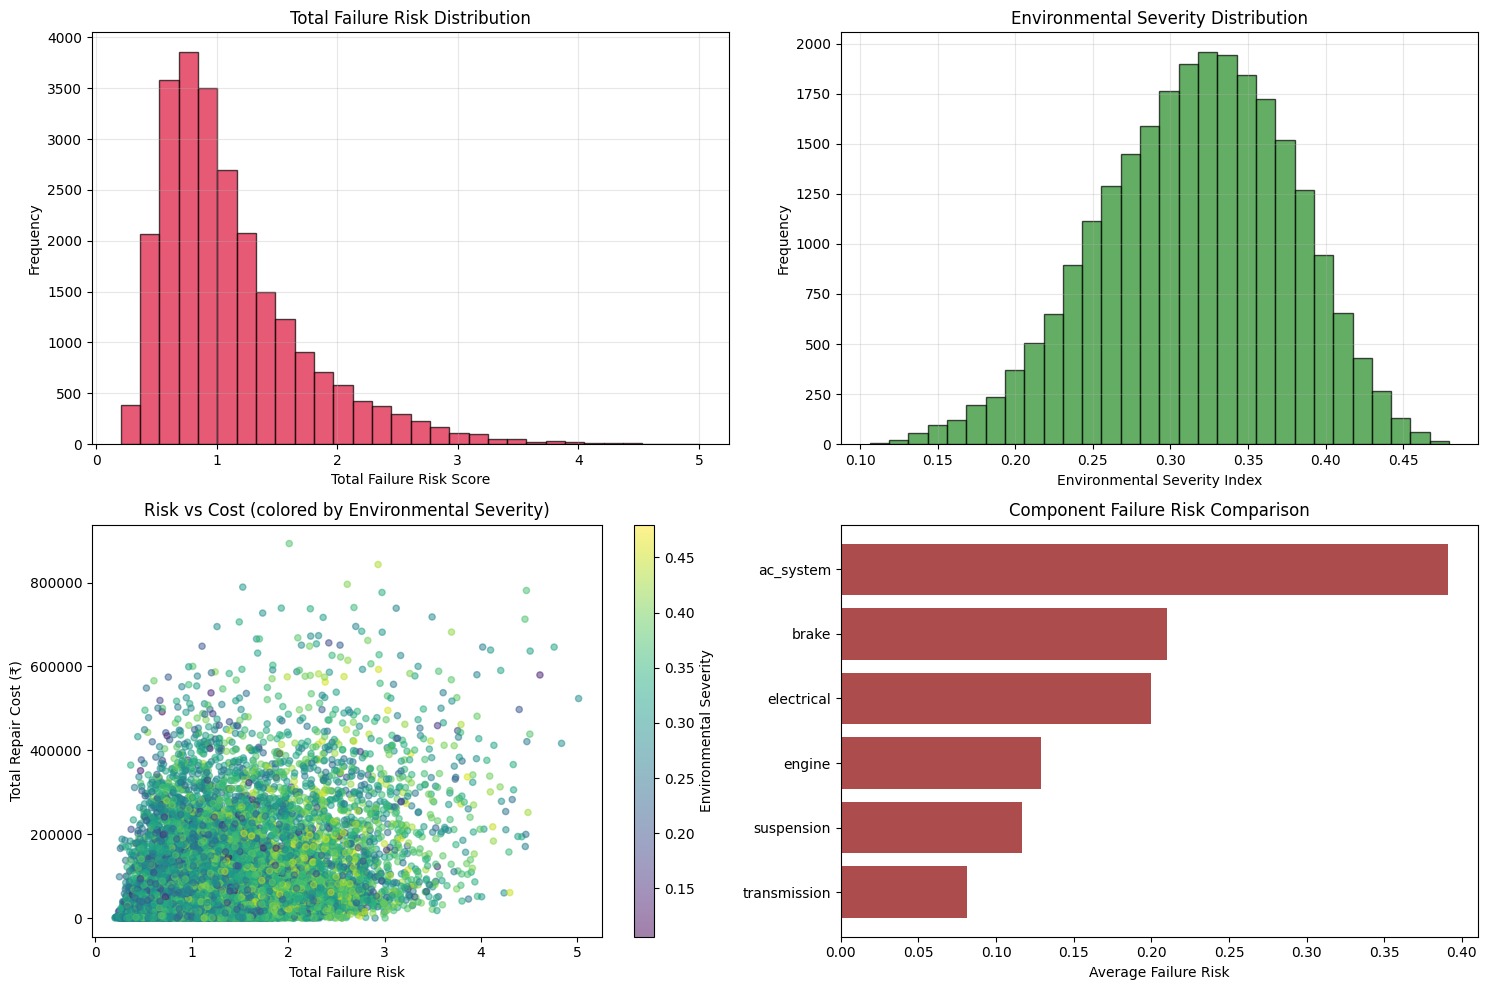

In [9]:
# Environmental factors and failure risk analysis with encoded data
print("🌍 ENVIRONMENTAL & RISK ANALYSIS WITH ENCODED DATA")
print("=" * 55)

# Identify risk columns
risk_columns = [col for col in df.columns if 'failure_risk' in col]
print(f"Risk factors identified: {len(risk_columns)}")
for col in risk_columns:
    print(f"  {col}: mean = {df[col].mean():.4f}")

# Create total failure risk if not exists
if 'total_failure_risk' not in df.columns:
    df['total_failure_risk'] = df[risk_columns].sum(axis=1)
    print(f"\nCreated total_failure_risk: mean = {df['total_failure_risk'].mean():.4f}")

# Identify environmental factors (encoded)
env_keywords = ['pollution', 'dust', 'temperature', 'monsoon', 'traffic', 'climate']
env_columns = []

for keyword in env_keywords:
    matching_cols = [col for col in df.columns if keyword in col.lower() and 
                    pd.api.types.is_numeric_dtype(df[col])]
    env_columns.extend(matching_cols)

env_columns = list(set(env_columns))  # Remove duplicates
print(f"\nEnvironmental factors identified: {len(env_columns)}")
for col in env_columns:
    print(f"  {col}: range = {df[col].min():.2f} to {df[col].max():.2f}")

# Create environmental severity index
if env_columns:
    # Normalize environmental factors to 0-1 scale
    env_normalized = df[env_columns].copy()
    for col in env_columns:
        if pd.api.types.is_bool_dtype(df[col]):
            # Convert boolean to numeric (True=1, False=0)
            env_normalized[col] = df[col].astype(int)
        elif df[col].max() > df[col].min():
            env_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        else:
            env_normalized[col] = 0.5  # Neutral if no variation
    
    df['environmental_severity'] = env_normalized.mean(axis=1)
    print(f"\nCreated environmental_severity index: mean = {df['environmental_severity'].mean():.4f}")
else:
    # Fallback if no clear environmental factors
    df['environmental_severity'] = 0.5  # Neutral baseline
    print(f"\nUsing neutral environmental_severity baseline")

# Visualize environmental and risk relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total failure risk distribution
axes[0,0].hist(df['total_failure_risk'], bins=30, alpha=0.7, color='crimson', edgecolor='black')
axes[0,0].set_xlabel('Total Failure Risk Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Total Failure Risk Distribution')
axes[0,0].grid(True, alpha=0.3)

# 2. Environmental severity distribution
axes[0,1].hist(df['environmental_severity'], bins=30, alpha=0.7, color='forestgreen', edgecolor='black')
axes[0,1].set_xlabel('Environmental Severity Index')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Environmental Severity Distribution')
axes[0,1].grid(True, alpha=0.3)

# 3. Risk vs Cost relationship
scatter = axes[1,0].scatter(df['total_failure_risk'], df['total_repair_cost'], 
                           alpha=0.5, c=df['environmental_severity'], cmap='viridis', s=20)
axes[1,0].set_xlabel('Total Failure Risk')
axes[1,0].set_ylabel('Total Repair Cost (₹)')
axes[1,0].set_title('Risk vs Cost (colored by Environmental Severity)')
plt.colorbar(scatter, ax=axes[1,0], label='Environmental Severity')

# 4. Component-wise failure risks comparison
if len(risk_columns) > 1:
    risk_means = df[risk_columns].mean().sort_values(ascending=True)
    axes[1,1].barh(range(len(risk_means)), risk_means.values, color='darkred', alpha=0.7)
    axes[1,1].set_yticks(range(len(risk_means)))
    axes[1,1].set_yticklabels([col.replace('_failure_risk', '') for col in risk_means.index])
    axes[1,1].set_xlabel('Average Failure Risk')
    axes[1,1].set_title('Component Failure Risk Comparison')
else:
    # Alternative: Age vs Environmental severity
    axes[1,1].scatter(df['vehicle_age_at_claim'], df['environmental_severity'], alpha=0.5)
    axes[1,1].set_xlabel('Vehicle Age at Claim')
    axes[1,1].set_ylabel('Environmental Severity')
    axes[1,1].set_title('Age vs Environmental Severity')

plt.tight_layout()
plt.show()

### Correlation Analysis with Encoded Features

Comprehensive correlation analysis using the properly encoded categorical variables.

🔗 CORRELATION ANALYSIS WITH ENCODED FEATURES
Top features correlated with Repair Cost:
  number_of_claims: +0.623
  suspension_failure_risk: +0.416
  total_failure_risk: +0.416
  electrical_failure_risk: +0.416
  brake_failure_risk: +0.409
  transmission_failure_risk: +0.406
  engine_failure_risk: +0.382
  ac_system_failure_risk: +0.376
  dust_exposure_level: +0.234
  mileage_at_claim: +0.160

Top features correlated with High-Cost Claims:
  number_of_claims: +0.561
  total_failure_risk: +0.358
  electrical_failure_risk: +0.353
  suspension_failure_risk: +0.352
  brake_failure_risk: +0.350
  transmission_failure_risk: +0.347
  ac_system_failure_risk: +0.335
  engine_failure_risk: +0.319
  dust_exposure_level: +0.211
  mileage_at_claim: +0.136


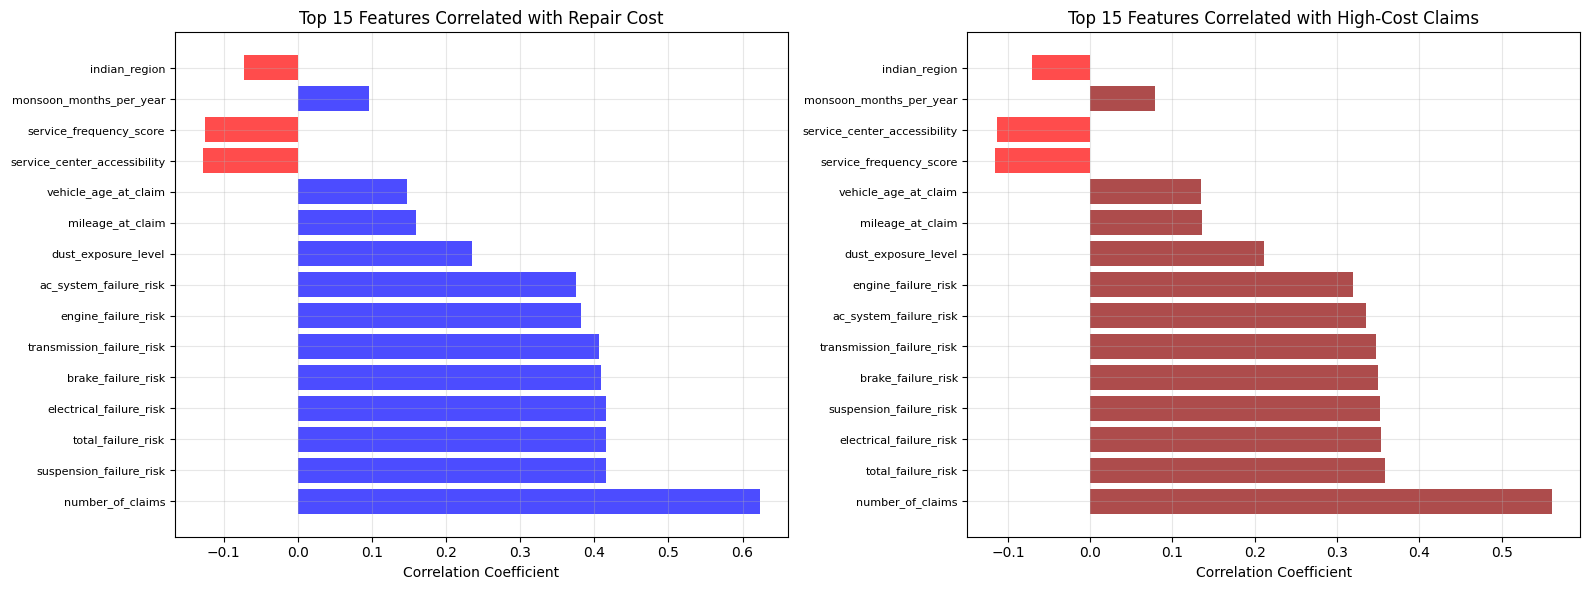


🎯 KEY CORRELATION INSIGHTS:
Strong predictors identified: 8

                      Feature  Repair_Cost_Corr  High_Cost_Corr
17        engine_failure_risk          0.381736        0.319177
18  transmission_failure_risk          0.406470        0.346962
19    electrical_failure_risk          0.415525        0.353173
20    suspension_failure_risk          0.415955        0.352462
21         brake_failure_risk          0.409479        0.350012
22     ac_system_failure_risk          0.375711        0.334813
24           number_of_claims          0.623077        0.561366
26         total_failure_risk          0.415559        0.357954


In [10]:
# Correlation analysis with encoded categorical features
print("🔗 CORRELATION ANALYSIS WITH ENCODED FEATURES")
print("=" * 50)

# Select numerical features for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numerical_cols if col not in ['vehicle_id']]

# Create correlation matrix
correlation_matrix = df[feature_cols].corr()

# Identify correlations with target variables
target_correlations = pd.DataFrame({
    'Feature': feature_cols,
    'Repair_Cost_Corr': [df[col].corr(df['total_repair_cost']) for col in feature_cols],
    'High_Cost_Corr': [df[col].corr(df['high_cost_claim_flag']) for col in feature_cols]
})

# Remove self-correlations
target_correlations = target_correlations[
    ~target_correlations['Feature'].isin(['total_repair_cost', 'high_cost_claim_flag'])
]

# Sort by absolute correlation strength
target_correlations['Abs_Repair_Corr'] = target_correlations['Repair_Cost_Corr'].abs()
target_correlations['Abs_High_Cost_Corr'] = target_correlations['High_Cost_Corr'].abs()

print("Top features correlated with Repair Cost:")
top_repair_corr = target_correlations.nlargest(10, 'Abs_Repair_Corr')
for _, row in top_repair_corr.iterrows():
    print(f"  {row['Feature']}: {row['Repair_Cost_Corr']:+.3f}")

print(f"\nTop features correlated with High-Cost Claims:")
top_high_cost_corr = target_correlations.nlargest(10, 'Abs_High_Cost_Corr')
for _, row in top_high_cost_corr.iterrows():
    print(f"  {row['Feature']}: {row['High_Cost_Corr']:+.3f}")

# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top correlations with repair cost
top_15_repair = target_correlations.nlargest(15, 'Abs_Repair_Corr')
bars1 = axes[0].barh(range(len(top_15_repair)), top_15_repair['Repair_Cost_Corr'], 
                     color=['red' if x < 0 else 'blue' for x in top_15_repair['Repair_Cost_Corr']], alpha=0.7)
axes[0].set_yticks(range(len(top_15_repair)))
axes[0].set_yticklabels(top_15_repair['Feature'], fontsize=8)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Features Correlated with Repair Cost')
axes[0].grid(True, alpha=0.3)

# Top correlations with high-cost flag
top_15_high_cost = target_correlations.nlargest(15, 'Abs_High_Cost_Corr')
bars2 = axes[1].barh(range(len(top_15_high_cost)), top_15_high_cost['High_Cost_Corr'],
                     color=['red' if x < 0 else 'darkred' for x in top_15_high_cost['High_Cost_Corr']], alpha=0.7)
axes[1].set_yticks(range(len(top_15_high_cost)))
axes[1].set_yticklabels(top_15_high_cost['Feature'], fontsize=8)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Features Correlated with High-Cost Claims')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation insights
print(f"\n🎯 KEY CORRELATION INSIGHTS:")
strong_predictors = target_correlations[
    (target_correlations['Abs_Repair_Corr'] > 0.3) | 
    (target_correlations['Abs_High_Cost_Corr'] > 0.3)
]
print(f"Strong predictors identified: {len(strong_predictors)}")
print(f"\n{strong_predictors[['Feature', 'Repair_Cost_Corr', 'High_Cost_Corr']]}")

# Categorical feature impact analysis
categorical_impact = {}
for col, info in encoding_summary.items():
    if info['method'] == 'One-Hot Encoding':
        # Analyze impact of one-hot encoded features
        for new_col in info['new_columns']:
            if new_col in target_correlations['Feature'].values:
                corr_row = target_correlations[target_correlations['Feature'] == new_col].iloc[0]
                categorical_impact[new_col] = {
                    'original_category': col,
                    'repair_corr': corr_row['Repair_Cost_Corr'],
                    'high_cost_corr': corr_row['High_Cost_Corr']
                }

if categorical_impact:
    print(f"\nCategorical feature impact (One-Hot Encoded):")
    for feature, impact in categorical_impact.items():
        print(f"  {feature}: repair_corr={impact['repair_corr']:+.3f}, high_cost_corr={impact['high_cost_corr']:+.3f}")

### Business Insights and Data Quality Assessment

Extract key business insights and assess data quality for modeling readiness.

In [11]:
# Business insights and data quality assessment
print("💼 KEY BUSINESS INSIGHTS FROM ENCODED DATA")
print("=" * 50)

# 1. Cost distribution insights
q75_cost = df['total_repair_cost'].quantile(0.75)
q95_cost = df['total_repair_cost'].quantile(0.95)
high_cost_vehicles = df[df['total_repair_cost'] > q95_cost]

print("1. WARRANTY COST PATTERNS:")
print(f"   • 75% of claims cost less than ₹{q75_cost:,.0f}")
print(f"   • Top 5% of claims (₹{q95_cost:,.0f}+) account for {high_cost_vehicles['total_repair_cost'].sum()/df['total_repair_cost'].sum()*100:.1f}% of total costs")
print(f"   • Average high-cost claim: ₹{high_cost_vehicles['total_repair_cost'].mean():,.0f}")

# 2. Risk factor insights
if len(risk_columns) > 1:
    component_risk_impact = {}
    for risk_col in risk_columns:
        high_risk_mask = df[risk_col] > df[risk_col].quantile(0.8)
        if high_risk_mask.sum() > 0:
            high_risk_cost = df[high_risk_mask]['total_repair_cost'].mean()
            normal_risk_cost = df[~high_risk_mask]['total_repair_cost'].mean()
            impact_ratio = high_risk_cost / normal_risk_cost if normal_risk_cost > 0 else 1
            component_risk_impact[risk_col] = impact_ratio

    print(f"\n2. COMPONENT RISK IMPACT (High vs Normal Risk Cost Ratio):")
    sorted_impact = sorted(component_risk_impact.items(), key=lambda x: x[1], reverse=True)
    for component, ratio in sorted_impact[:5]:
        clean_name = component.replace('_failure_risk', '').replace('_', ' ').title()
        print(f"   • {clean_name}: {ratio:.1f}x higher cost")

# 3. Environmental factor insights
if 'environmental_severity' in df.columns:
    high_env_mask = df['environmental_severity'] > df['environmental_severity'].quantile(0.8)
    low_env_mask = df['environmental_severity'] < df['environmental_severity'].quantile(0.2)
    
    if high_env_mask.sum() > 0 and low_env_mask.sum() > 0:
        high_env_cost = df[high_env_mask]['total_repair_cost'].mean()
        low_env_cost = df[low_env_mask]['total_repair_cost'].mean()
        env_impact_ratio = high_env_cost / low_env_cost
        
        print(f"\n3. ENVIRONMENTAL IMPACT:")
        print(f"   • High environmental severity vehicles cost {env_impact_ratio:.1f}x more than low severity")
        print(f"   • High severity average cost: ₹{high_env_cost:,.0f}")
        print(f"   • Low severity average cost: ₹{low_env_cost:,.0f}")

# 4. Categorical encoding impact
print(f"\n4. CATEGORICAL ENCODING RESULTS:")
total_features_before = len(df_raw.columns)
total_features_after = len(df.columns)
print(f"   • Features before encoding: {total_features_before}")
print(f"   • Features after encoding: {total_features_after}")
print(f"   • Net feature change: {total_features_after - total_features_before:+d}")

for col, info in encoding_summary.items():
    if info['method'] == 'One-Hot Encoding':
        print(f"   • {col}: {len(info['original_categories'])} categories → {len(info['new_columns'])} binary features")
    else:
        print(f"   • {col}: {info['method']}")

# 5. Data quality assessment
print(f"\n5. DATA QUALITY FOR MODELING:")

# Check for any remaining non-numeric features (except IDs)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
modeling_blocking_cols = [col for col in non_numeric_cols if col != 'vehicle_id']

if modeling_blocking_cols:
    print(f"   ⚠️ Non-numeric columns still present: {modeling_blocking_cols}")
else:
    print(f"   ✅ All features properly encoded for modeling")

# Feature count for modeling
modeling_features = [col for col in df.columns if col not in 
                    ['vehicle_id', 'total_repair_cost', 'high_cost_claim_flag', 'number_of_claims']]
print(f"   • Available modeling features: {len(modeling_features)}")

# Missing value check
missing_data = df.isnull().sum().sum()
if missing_data > 0:
    print(f"   ⚠️ Missing values detected: {missing_data}")
else:
    print(f"   ✅ No missing values in encoded dataset")

print(f"\n✅ EDA completed with realistic categorical encoding!")
print(f"📊 Dataset ready for machine learning with {len(modeling_features)} features")

💼 KEY BUSINESS INSIGHTS FROM ENCODED DATA
1. WARRANTY COST PATTERNS:
   • 75% of claims cost less than ₹66,534
   • Top 5% of claims (₹253,435+) account for 30.9% of total costs
   • Average high-cost claim: ₹357,504

2. COMPONENT RISK IMPACT (High vs Normal Risk Cost Ratio):
   • Electrical: 2.7x higher cost
   • Suspension: 2.7x higher cost
   • Brake: 2.7x higher cost
   • Transmission: 2.7x higher cost
   • Ac System: 2.6x higher cost

3. ENVIRONMENTAL IMPACT:
   • High environmental severity vehicles cost 1.4x more than low severity
   • High severity average cost: ₹70,170
   • Low severity average cost: ₹51,005

4. CATEGORICAL ENCODING RESULTS:
   • Features before encoding: 36
   • Features after encoding: 59
   • Net feature change: +23
   • make_model_code: 5 categories → 4 binary features
   • engine_type: 5 categories → 4 binary features
   • transmission_type: 4 categories → 3 binary features
   • manufacturing_batch: Label Encoding (High Cardinality)
   • terrain_type: 4 c

In [12]:
len(df)

25000

### Data Preparation Summary for ML

Final summary of data preparation and recommendations for subsequent modeling steps.

#### Key EDA Findings Summary

**Dataset Quality**: 25000 vehicles with complete warranty records, properly encoded categorical variables

**Categorical Encoding**: Applied industry-standard encoding strategies:
- Ordinal variables: Custom ordinal mapping preserving natural order
- Binary variables: Label encoding
- Low cardinality (≤5): One-hot encoding  
- High cardinality: Label encoding

**Cost Patterns**: Highly right-skewed distribution with top 5% of claims driving significant warranty costs

**Predictive Features**: Multiple features show strong correlation with warranty outcomes

**Data Readiness**: All categorical variables properly encoded (including ordinal relationships), no missing values, ready for ML modeling

#### Recommendations for ML Implementation

**Model Selection**: Use ensemble methods (XGBoost/LightGBM) for handling mixed data types and non-linear relationships

**Feature Engineering**: Implement risk aggregations and interaction terms with encoded categorical features

**Validation Strategy**: Apply stratified sampling to ensure representative evaluation across encoded categorical groups

**Business Focus**: Prioritize high-cost claim identification for proactive intervention strategies



## References

**Key References**:
1. **Categorical Encoding**: Potdar, K. et al. (2017) - A Comparative Study of Categorical Variable Encoding Techniques
2. **Automotive Data Analysis**: Tukey, J.W. (1977) - Exploratory Data Analysis principles  
3. **Feature Engineering**: Kuhn, M. & Johnson, K. (2019) - Feature Engineering and Selection
4. **Business Intelligence**: Few, S. (2009) - Now You See It: Simple Visualization Techniques